# Hochschule Bonn-Rhein-Sieg

# Mathematics for Robotics and Control WS17

# Assignment 8: Laplace Transform

### Team members: Vajra Ganeshkumar, Jeeveswaran Kishaan

### Second-order differential equations [30 points]

In [4]:
import scipy
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from scipy import signal
sp.init_printing(use_latex=True)

## **1**. [15 points] The differential equation governing the voltage $V_C$ across a capacitor $C$ in a driver series RLC circuit is given as ("Foundations of Analog and Digital Electronic Circuits" by Agarwal and Lang)

\begin{equation*}
    V_C'' + \frac{R}{L}V_C' + \frac{1}{LC}V_c = \frac{1}{LC}V_{IN}
\end{equation*}

where $C$ is the capacitance (in farads), $L$ is the inductance (in henrys), $R$ is the resistance (in ohms), and $V_{IN}$ is the input voltage to the circuit. For the purposes of this problem, let's assume that $R = 10k\Omega$, $C = 0.01\mu F$, $L = 1000\mu H$, and $V_{IN} = 5.0V$ and that $V_C(0) = 0$, $V_C'(0) = 0$. Solve the given initial value problem:

1. using one of the methods for solving second-order nonhomogeneous differential equations we looked at in the ODE II lab class and
2. using the Laplace transform.

Are the solutions obtained by the two methods equivalent? Which of the methods was easier to apply?

#### Answer ####

### 1. Using undetermined coefficients ###

After substituting values for R,L and C, the equation will be 

\begin{equation*}
    V_C'' + \frac{10\times10^3 }{1000 \times 10^{-6} }V_C' + \frac{1}{1000 \times 10^{-6} \times 0.01 \times 10^{-6}}V_c = \frac{1}{1000 \times 10^{-6} \times 0.01 \times 10^{-6}}(5) ---(1)
\end{equation*}     

* Solving this second order nonhomogeneous differential equation using undetermined co-efficients method <br>
The general solution will be of the form $$x(t) =x_c(t)+x_p(t)$$<br>
Now, we solve for complementary solution <br>
The characteristic equation for the differential equation is $$ k^2+10^7k + 10^{11} =0$$ <br>
Solving this equation we get <br> $k_1 = -10010.02005$ <br>
$k_2 =-9989989.98$<br>
<br>
The complementary solution is <br>
$$V_c{_c(t)} = c_1e^{-10010.02005t}+c_2e^{-9989989.98t}$$
<br>
Now we solve for particular solution
$$ V_c{_p(t)} = A$$ <br>
$V'_c{_p(t)} = 0$ <br>
$V''_c{_p(t)}= 0$ <br>
<br>
By substituting the guesses in the equation(1), we get
$$A = 5 \times 10^{11} $$
<br>
Therefore the general solution for the differential equation is <br> 
<br>
$$ V(t) = c_1e^{-10010.02005t}+c_2e^{-9989989.98t} + 5  $$

### 2. Using the Laplace Transform ###

\begin{equation*}
    V_C'' + \frac{R}{L}V_C' + \frac{1}{LC}V_c = \frac{1}{LC}V_{IN}
\end{equation*}

Applying the Laplace Transform to the equation above, 

$$ L\{Y''\} + 10^{7} L\{y'\} + 10^{11} L\{y\} = 5 \times 10^{11} L\{1\} $$

$$ [s^2F(s) - sf(0) - f'(0)] + 10^7 [sF(s) - f(0)] + 10^{11} F(s) = \frac{5 \times 10^{11}}{s} $$ 

Plugging in the initial values for $f(0)$ and $f'(0)$, 

$$ s^2F(s) - 0 - 0 + 10^7 [sF(s) - 0] + 10 ^{11} F(s) = \frac{5 \times 10^{11}}{s} $$

$$ s^2F(s) + 10^7 sF(s) + 10 ^{11} F(s) = \frac{5 \times 10^{11}}{s} $$

$$ F(s) = \frac{5 \times 10^{11}}{s(s^2+10^7 s + 10^{11})} $$

$$ F(s) = \frac{5}{s} - \frac{5}{s + 10010.02005} + \frac{5.015 \times 10^{-3}}{s + 9989989.98} $$

Applying the imverse Laplace Transform,

$$ F(t) = 5 -  5 e^{-10010.02005} + 5.015 \times 10^{-3} e^{-9989989.98} $$


## The solutions obtained by using both the mathods are equivalent and for this second order Ordinary Differential Equation, we found the Laplace Transform to be easier to apply. The undetermined coefficients method was not so complex for this problem though!

#### Reference: 
##### Undetermined Coefficients: 
##### MRC Lab Class Exercises 07 solutions file
##### Laplace transform and inverse Laplace Transform: 
##### http://tutorial.math.lamar.edu/Classes/DE/Laplace_Table.aspx

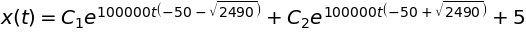

In [2]:
t = sp.symbols('t')
x = sp.Function('x')(t)
x_prime = sp.Derivative(x, t)
x_prime2 = sp.diff(x, t, 2)
eq = x_prime2 + 10**7 * x_prime + 10**11 * x - 5*10**11 
sp.dsolve(eq)

**2**. [15 points] (Taken from "Mathematical Methods for Physics and Engineering" by Riley, Hobson, and Bence) Solve the following initial value problem using the Laplace transform:

\begin{gather*}
    y'' + 4y' + 6y = 0 \\
    y(0) = 1, y'(0) = -4
\end{gather*}

#### Answer ####
$$L(y'' + 4y' + 6y = 0)$$
$$ [s^2Y(s)-sy(0)-y'(0)]+4 [sY(s)-y(0)]+6[Y(s)] = 0 $$ <br>
<br>
Substituting the initial values in the above equation,<br>
<br>
$$[s^2Y(s)-s(1)-(-4)] + 4[sY(s)-(1)]+6[Y(s)] = 0$$ <br>
Now we solve for Y(s) <br>
$$s^2Y(s)-s+4+4sY(s)-4+6Y(s) = 0$$ 
<br>
$$ (s^2+4s+6)Y(s)- s = 0$$
<br>
$$(s^2+4s+6)Y(s)= s$$
<br>
$$Y(s)= \frac{s}{(s^2+4s+6)}$$
<br>
$$Y(s)= \frac{s}{(s+2)^2 +6-4} $$
 <br>
 $$Y(s)= \frac{s}{(s+2)^2 +2} $$
 
We now add and substract 2 in the numerator to get the equation in the desired form <br>
<br>
$$Y(s)= \frac{s+2-2}{(s+2)^2 +2} $$
Rewriting the above equation in the desired form,
$$Y(s)= \frac{s+2}{(s+2)^2 +2} - \frac{2}{(s+2)^2 +2}$$
<br>
$$Y(s)= \frac{s+2}{(s+2)^2 +(\sqrt 2)^2} - \frac{2}{(s+2)^2 +(\sqrt 2)^2}$$
<br>
By taking the Laplace inverse,
<br>
$$y(t)= e^{-2t} cos(\sqrt2 t) - \sqrt{2} e^{-2t} sin(\sqrt{2}t)$$

#### Reference:
##### Laplace transform and inverse Laplace Transform: 
##### http://tutorial.math.lamar.edu/Classes/DE/Laplace_Table.aspx

### Higher-order differential equations [20 points]

In the lecture and lab class, we looked at various examples of using the Laplace transform for solving second-order differential equations; however, the transform itself is not limited to this case and can also be applied to higher-order equations. In this exercise, your task is to solve the following third-order initial value problem using the Laplace transform:

\begin{gather*}
    y''' + 3y'' - y' - 12y - 10t = \cos(5t) \\
    y(0) = 1, \; y'(0) = 0, \; y''(0) = 0
\end{gather*}

#### Answer ####
\begin{equation*}
y''' + 3y'' - y' - 12y - 10t = \cos(5t)
\end{equation*}

Applying the Laplace Transform to the equation above,

$$ L\{y'''\} + 3L\{y''\} - L\{y'\} - 12L\{y\} - 10L\{t\} = L\{\cos(5t)\} $$

$$ [s^2F(s) - s^2f(0) - sf'(0) - f''(0)] + 3[s^2F(s) - sf(0) - f'(0)] - [sF(s) - f(0)] - 12F(s) - \frac{10}{s^2} = \frac{s}{s^2+25} $$

After plugging in the initial values given for $f(0)$, $f'(0)$ and $f''(0)$, 

$$ s^3F(s) + 3s^2F(s) - sF(s) - 12F(s) - s^2 -3s + 1 - \frac{10}{s^2} = \frac{s}{s^2+25} $$

$$ F(s) = \frac{s}{s^2 + 25} + \frac{10}{s^2} + s^2 + 3s - 1 \times \frac{1}{s^3+3s^2-s-12} $$

$$ F(s) = \frac{s^6 + 3s^5 + 24s^4 + 76s^3 - 15s^2 + 250}{(s^2+25)s^2(s^3+3s^2-s-12)} $$

$$ F(s) = \frac{s^6 + 3s^5 + 24s^4 + 76s^3 - 15s^2 + 250}{s^7+25s^5+3s^6+75s^4-s^5 - 25s^3 -12s^4 -300s^2} $$

$$ F(s) = \frac{s^6 + 3s^5 + 24s^4 + 76s^3 - 15s^2 + 250}{s^7+3s^6+24s^5-s^5 + 63 s^4 - 25s^3 -300s^2} $$

In [5]:
b = [0,1,3,24,76,-15,0,250] #coefficients of the numerator
a = [1,3,24,63,-25,-300,0,0] #coefficients of the denominator

scipy.signal.residue(b, a, tol=0.001, rtype='avg')

(array([ 0.06944444+0.j        , -0.83333333+0.j        ,
         0.58560392+0.j        ,  0.17425358-0.27844561j,
         0.17425358+0.27844561j, -0.00177776+0.00265642j,
        -0.00177776-0.00265642j]),
 array([  0.00000000e+00+0.j        ,   0.00000000e+00+0.j        ,
          1.70652795e+00+0.j        ,  -2.35326398e+00+1.22228073j,
         -2.35326398e+00-1.22228073j,   1.72084569e-15+5.j        ,
          1.72084569e-15-5.j        ]),
 array([ 0.]))

After solving for the roots of the above equation using scipy, the equation reduces to;

$$ F(s) = \frac{0.069}{s} - \frac{0.833}{s} + \frac{0.586}{s - 1.706} + \frac{0.174 - 0.278j}{s - (-2.35 + 1.22j)} + \frac{0.174 + 0.278j}{s - (-2.35 - 1.22j)} $$

$$ + \frac{-0.0017 + 0.0026j}{s - (5j)} + \frac{-0.0017 - 0.0026j}{s - (-5j)} $$

Taking the inverse laplace transform;

$$ y(t) = f(t) = 0.069 - 0.833 + .058 e^{1.706} + 2 e^{-2.35t} [0.174cos(1.22t) + 0.278 sin(1.22t)] $$
$$ - 2 [0.00177cos(5t) + 0.0026 sin(5t)] $$

#### Reference:
##### Scipy residue function: 
##### https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.signal.residue.html
##### Laplace transform and inverse Laplace Transform: 
##### http://tutorial.math.lamar.edu/Classes/DE/Laplace_Table.aspx

### Systems of differential equations [30 points]

(Taken from "Mathematical Methods for Physics and Engineering" by Riley, Hobson, and Bence) Use the Laplace transform to solve, for $t \geq 0$, the differential equations

\begin{gather*}
    x'' + 2x + y = \cos(t) \\
    y'' + 2x + 3y = 2\cos(t)
\end{gather*}

which describe a coupled system that starts from rest at the equilibrium position (i.e. $x(0) = 0$, $x'(0) = 0$, $y(0) = 0$, and $y'(0) = 0$).

#### Answer ####
To solve the system of differential equations using laplace, first we need to find the laplace transform of the equations individually <br>
$$  x'' + 2x + y = \cos(t)$$<br>
$$  L[x'' + 2x + y] = L[\cos(t)]$$<br>
$$ L[x'']+L[2x]+L[y]= L[\cos(t)]$$<br> 
$$[s^2X(s)-sx(0)-x'(0)]+2[X(s)]+Y(s) = \frac{s}{s^2+1}$$<br>
By substituting the initial values, we get <br>
$$ s^2X(s)+2X(s)+Y(s) = \frac{s}{s^2+1}         ---------(1)$$<br>
$$y'' + 2x + 3y = 2\cos(t)$$<br>
$$  L[y'' + 2x + 3y] = L[2\cos(t)]$$<br>
$$ L[y'']+L[2x]+L[3y]= L[2\cos(t)]$$<br> 
$$[s^2Y(s)-sy(0)-y'(0)]+2[X(s)]+3[Y(s)] = \frac{2s}{s^2+1}$$<br>
By substituting the initial values, we get <br>
$$s^2Y(s)+2X(s)+3Y(s) = \frac{2s}{s^2+1} $$<br>
$$(s^2+3)Y(s)+2X(s) = \frac{2s}{s^2+1} -------(2)$$<br>
Now we need to solve this for one of the transforms.We’ll do this by multiplying the first equation by $(s^2+3)$ and then subtracting.This gives,<br>
<br>
$$[(s^2+2)(s^2+3)-2]X(s) = \frac{s(s^2+3)}{s^2+1}-\frac{2s}{s^2+1}$$<br>
Rearranging the above equation we get,<br>
$$X(s)= \frac{s}{(s^2+1)(s^2+4)} -----(3)$$<br>
By substituting the above result in equation 2,we get<br>
$$Y(s)=\frac{2s}{(s^2+1)(s^2+4)}-------(4)$$<br>
Partially decomposing equation 3,we get<br>
$$\frac{s}{(s^2+1)(s^2+4)} = \frac{As+B}{(s^2+1)}+\frac{Cs+D}{(s^2+4)}$$ <br>
Solving for A,B,C and D we get,<br>
$A =\frac{1}{3}$<br>
$B = 0 $<br>
$C = \frac{-1}{3}$ <br>
$D = 0$ <br>
Hence,
$$\frac{s}{(s^2+1)(s^2+4)} = \frac{\frac{1}{3}s+0}{(s^2+1)}+\frac{\frac{-1}{3}s+0}{(s^2+4)}$$ <br>
Solving this equation we get,
$$\frac{s}{(s^2+1)(s^2+4)} = \frac{\frac{1}{3}s}{(s^2+1)}+\frac{\frac{1}{3}s}{(s^2+4)}$$ <br>
$$\frac{s}{(s^2+1)(s^2+4)} = L^{-1}[\frac{\frac{1}{3}s}{(s^2+1)}]+L^{-1}[\frac{\frac{1}{3}s}{(s^2+4)}]$$ <br>
Hence we get,
$$x(t) = \frac{1}{3}(\cos(t)-\cos(2t))$$ <br>
**********************************************************************************************************
Partially decomposing equation 4,we get<br>
$$\frac{2s}{(s^2+1)(s^2+4)} = \frac{As+B}{(s^2+1)}+\frac{Cs+D}{(s^2+4)}$$ <br>
Solving for A,B,C and D we get,<br>
$A =\frac{2}{3}$<br>
$B = 0 $<br>
$C = \frac{-2}{3}$ <br>
$D = 0$ <br>
Hence,
$$\frac{2s}{(s^2+1)(s^2+4)} = \frac{\frac{2}{3}s+0}{(s^2+1)}+\frac{\frac{-2}{3}s+0}{(s^2+4)}$$ <br>
Solving this equation we get,
$$\frac{2s}{(s^2+1)(s^2+4)} = \frac{\frac{2}{3}s}{(s^2+1)}+\frac{\frac{-2}{3}s}{(s^2+4)}$$ <br>
$$\frac{2s}{(s^2+1)(s^2+4)} = L^{-1}[\frac{\frac{2}{3}s}{(s^2+1)}]+L^{-1}[\frac{\frac{-2}{3}s}{(s^2+4)}]$$ <br>
Hence we get,
$$y(t) = \frac{2}{3}(\cos(t)-\cos(2t))$$ <br>
So the solution to the system of differential equations is
* $$x(t) = \frac{1}{3}(\cos(t)-\cos(2t))$$ <br>
<br>
* $$y(t) = \frac{2}{3}(\cos(t)-\cos(2t))$$ <br>

#### Reference ####
* http://tutorial.math.lamar.edu/Classes/DE/SystemsLaplace.aspx
* Laplace transform and inverse Laplace Transform: 
  http://tutorial.math.lamar.edu/Classes/DE/Laplace_Table.aspx